Se quiere utilizar una red neuronal para predecir el número de usuarios que utilizarán un servicio de bicicletas públicas en una ciudad.  

El dataset “day.csv” se encuentra disponible en el siguiente enlace, donde también se describe cada una de las variables:
https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Bike%20Sharing  

**SE PIDE:**
Implementar una única red neuronal para predecir el uso de bicicletas de usuarios registrados (columna “registered”) y usuarios casuales (columna “casual”).  
Para ello:  
1)	Selecciona las variables que creas que puedan relacionarse con el objetivo  
2)	Transforma y prepara las variables para poder entrenar la red neuronal  
3)	Divide el conjunto de datos en entrenamiento (80%) y test (20%) con random_state=123  
4)	Diseña y entrena la red neuronal  
5)	Mide el desempeño para cada una de las variables de salida.  

¿En qué día del conjunto de test el modelo presenta más error para usuarios registrados y casuales?



In [1]:
import pandas as pd
import numpy as np

day = pd.read_csv('day.csv')

In [2]:
day.sample(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
23,24,2011-01-24,1,0,1,0,1,1,1,0.097391,0.117930,0.491739,0.158330,86,1330,1416
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
169,170,2011-06-19,2,0,6,0,0,0,2,0.699167,0.645846,0.666667,0.102000,1639,3105,4744
398,399,2012-02-03,1,1,2,0,5,1,1,0.313333,0.309346,0.526667,0.178496,310,3841,4151


In [4]:
from sklearn.model_selection import train_test_split
X = day[['season','yr','mnth','holiday','weekday','workingday',
        'weathersit','temp','atemp','hum','windspeed']]
y = day[['casual','registered']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                   random_state=123)

In [9]:
X_train.shape

(584, 11)

In [6]:
pd.concat([X_train,y_train],axis=1).corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,0.001772,0.822845,-0.010066,-0.036938,0.011581,-0.006740,0.337351,0.346806,0.217442,-0.238207,0.213493,0.416023
yr,0.001772,1.000000,-0.001459,-0.011965,0.018720,-0.022242,-0.019963,0.073277,0.071204,-0.085142,-0.042130,0.258478,0.581260
mnth,0.822845,-0.001459,1.000000,-0.004058,-0.025541,-0.006635,0.013106,0.216033,0.224360,0.227032,-0.216125,0.120952,0.294245
holiday,-0.010066,-0.011965,-0.004058,1.000000,-0.107472,-0.251305,-0.033590,-0.002097,-0.007361,-0.018828,0.010098,0.077035,-0.098624
weekday,-0.036938,0.018720,-0.025541,-0.107472,1.000000,0.025443,0.058395,-0.013127,-0.023750,-0.054774,0.027333,0.053688,0.063013
workingday,0.011581,-0.022242,-0.006635,-0.251305,0.025443,1.000000,0.068909,0.051184,0.052418,0.029314,-0.029305,-0.517072,0.294984
weathersit,-0.006740,-0.019963,0.013106,-0.033590,0.058395,0.068909,1.000000,-0.144479,-0.140343,0.575957,0.051818,-0.246773,-0.266768
temp,0.337351,0.073277,0.216033,-0.002097,-0.013127,0.051184,-0.144479,1.000000,0.990494,0.117457,-0.151653,0.560583,0.568824
atemp,0.346806,0.071204,0.224360,-0.007361,-0.023750,0.052418,-0.140343,0.990494,1.000000,0.135134,-0.180357,0.558974,0.572362
hum,0.217442,-0.085142,0.227032,-0.018828,-0.054774,0.029314,0.575957,0.117457,0.135134,1.000000,-0.253027,-0.069307,-0.084881


<AxesSubplot:xlabel='temp', ylabel='atemp'>

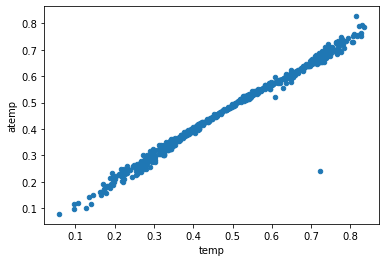

In [8]:
X_train[['temp','atemp']].plot.scatter(x='temp',y='atemp')

In [14]:
X_train = X_train.drop(columns=['atemp'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
x_MinMax = MinMaxScaler()
y_MinMax = MinMaxScaler()

x = x_MinMax.fit_transform(X_train)
y = y_MinMax.fit_transform(y_train)

In [16]:
x.shape, y.shape

((584, 10), (584, 2))

In [13]:
y

array([[0.26085681, 0.92650881],
       [0.0991784 , 0.72408316],
       [0.21860329, 0.73678891],
       ...,
       [0.03139671, 0.46881317],
       [0.20070423, 0.22928097],
       [0.41519953, 0.76479931]])

In [46]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(10,10))
mlp.fit(x,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [47]:
# Predecir en train y test
pred_train = mlp.predict(x)
pred_train2 = y_MinMax.inverse_transform(pred_train)
pred_train2

array([[ 930.66393804, 5469.00008419],
       [ 623.37676514, 4214.39065231],
       [ 739.3464659 , 5872.76299825],
       ...,
       [  33.03262041, 4224.06361975],
       [2205.72968006, 2578.97699834],
       [1486.67882819, 5764.82338618]])

In [48]:
pred_test = mlp.predict(x_MinMax.transform(X_test.drop(columns=['atemp'])))
pred_test2 = y_MinMax.inverse_transform(pred_test)
pred_test2

array([[ 6.54112019e+02,  4.49484669e+03],
       [ 1.46253283e+03,  1.68674435e+03],
       [ 3.27818010e+02,  1.52317591e+03],
       [-7.59492892e+01,  2.65414635e+03],
       [ 5.41506814e+02,  2.87846257e+03],
       [ 9.84122287e+02,  3.89755418e+03],
       [ 6.69848533e+02,  3.66170540e+03],
       [ 1.82735803e+03,  4.75506584e+03],
       [ 8.71879919e+02,  5.46105482e+03],
       [ 9.84078612e+02,  3.34316201e+03],
       [ 1.06690355e+02,  4.47592235e+03],
       [ 8.19408968e+02,  4.23061923e+03],
       [ 1.35838294e+03,  2.48626418e+03],
       [ 8.53315207e+02,  4.69557911e+03],
       [ 8.75154991e+02,  3.33540173e+03],
       [ 7.99529554e+02,  4.79844714e+03],
       [ 1.54029388e+03,  2.07215478e+03],
       [ 1.65382369e+03,  3.86263806e+03],
       [ 8.31814340e+02,  5.39916288e+03],
       [ 4.32625024e+02,  5.30113480e+03],
       [ 1.69423028e+03,  5.13279411e+03],
       [ 1.49268139e+03,  1.97114872e+03],
       [ 7.23544426e+01,  2.26323110e+03],
       [ 9.

In [49]:
y_test['pred_casual'] = pred_test2[:,0]
y_test['pred_reg'] = pred_test2[:,1]

y_test['pred_casual'] = y_test['pred_casual'].astype('int')
y_test['pred_reg'] = y_test['pred_reg'].astype('int')

y_test['pred_casual'] = np.where(y_test.pred_casual<0,0,y_test.pred_casual)
y_test['pred_reg'] = np.where(y_test.pred_reg<0,0,y_test.pred_reg)

y_test

,casual,registered,pred_casual,pred_reg
488,764,5657,654,4494
421,515,2874,1462,1686
91,898,1354,327,1523
300,456,3291,0,2654
177,854,3854,541,2878
...,...,...,...,...
631,2454,5453,1723,3730
548,904,5323,1441,5361
439,1005,5187,1287,4698
449,1532,3464,1391,2681


In [50]:
# Registrados
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test.registered,y_test.pred_reg,squared=False)
r2 = r2_score(y_test.registered,y_test.pred_reg)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 962.759137304126
Test R2: 0.6094946891743684


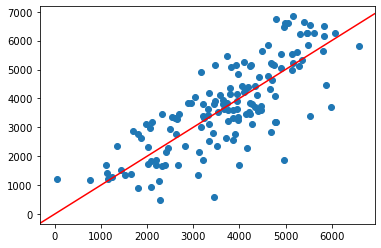

In [51]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_reg, y_test.registered,'o')
plt.axline([0,0],[1,1],color='red');

In [52]:
# Casuales

mse = mean_squared_error(y_test.casual,y_test.pred_casual,squared=False)
r2 = r2_score(y_test.casual,y_test.pred_casual)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 500.1536022566869
Test R2: 0.32534704759373745


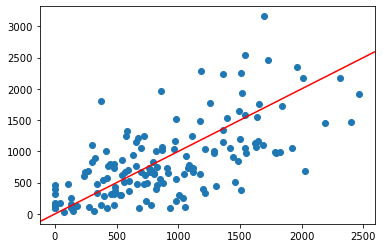

In [53]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_casual, y_test.casual,'o')
plt.axline([0,0],[1,1],color='red');

In [56]:
# Día de más fallos
y_test['DifCasual'] = np.abs(y_test.casual - y_test.pred_casual)
y_test['DifReg'] = np.abs(y_test.registered-y_test.pred_reg)
y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,654,4494,110,1163
421,515,2874,1462,1686,947,1188
91,898,1354,327,1523,571,169
300,456,3291,0,2654,456,637
177,854,3854,541,2878,313,976
...,...,...,...,...,...,...
631,2454,5453,1723,3730,731,1723
548,904,5323,1441,5361,537,38
439,1005,5187,1287,4698,282,489
449,1532,3464,1391,2681,141,783


In [65]:
idxmax = y_test.loc[y_test.DifCasual==y_test.DifCasual.max()].index.values[0]
day.iloc[idxmax,:].dteday

'2012-09-15'

In [66]:
idxmax = y_test.loc[y_test.DifReg==y_test.DifReg.max()].index.values[0]
day.iloc[idxmax,:].dteday

'2012-12-27'

<AxesSubplot:xlabel='dteday'>

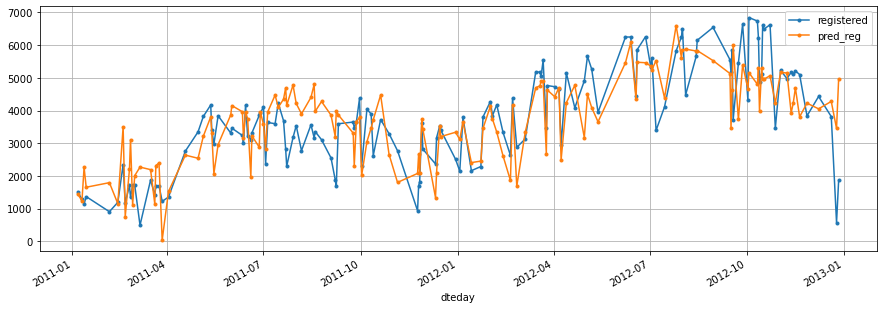

In [67]:
df = pd.merge(day, y_test[['pred_casual','pred_reg']], left_index=True, right_index=True)
df.dteday= pd.to_datetime(df.dteday)
df.plot(x='dteday',y=['registered','pred_reg'],figsize=(15,5),style='.-',grid=True)

<AxesSubplot:xlabel='dteday'>

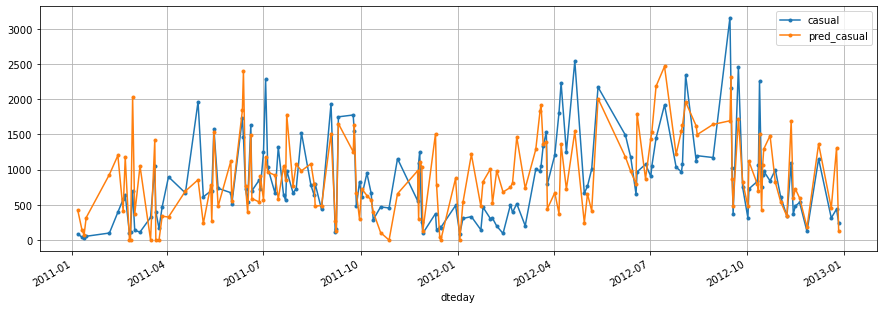

In [68]:
df.dteday= pd.to_datetime(df.dteday)
df.plot(x='dteday',y=['casual','pred_casual'],figsize=(15,5),style='.-',grid=True)

In [69]:
from sklearn.model_selection import GridSearchCV

mlp3 = MLPRegressor()
    
parameters = {
    'hidden_layer_sizes': [(20,), (30,), (50,), (20,20), (30,15), (50,50), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'max_iter':[100,500,1000]
}

clf = GridSearchCV(mlp3, parameters, n_jobs=-1, cv=10)
clf.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
           

In [75]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100, 100),
 'max_iter': 1000,
 'solver': 'adam'}

In [70]:
pred_test = clf.predict(x_MinMax.transform(X_test.drop(columns=['atemp'])))
pred_test2 = y_MinMax.inverse_transform(pred_test)
pred_test2

array([[ 8.48905112e+02,  4.70553175e+03],
       [ 1.06308167e+03,  2.72754275e+03],
       [ 7.26931324e+02,  1.58317818e+03],
       [ 2.04148500e+02,  2.99655662e+03],
       [ 6.59754043e+02,  3.56495299e+03],
       [ 1.60062759e+03,  2.73343944e+03],
       [ 6.39106708e+02,  3.81057389e+03],
       [ 6.71524199e+02,  4.41965377e+03],
       [ 1.26035974e+03,  6.12895025e+03],
       [ 3.86411721e+02,  4.12560372e+03],
       [ 4.88641693e+02,  3.68458630e+03],
       [ 7.84279791e+02,  2.81470941e+03],
       [ 1.99355858e+03,  3.58742861e+03],
       [ 1.01677148e+03,  4.28419249e+03],
       [ 2.30415533e+02,  2.16620603e+03],
       [ 8.13662899e+02,  4.11846432e+03],
       [ 1.34968039e+03,  2.28058800e+03],
       [ 1.79034773e+03,  3.27119702e+03],
       [ 1.06187341e+03,  5.87303541e+03],
       [ 5.96390892e+02,  4.71838965e+03],
       [ 2.39882208e+03,  4.77292121e+03],
       [ 1.61566778e+03,  2.66067609e+03],
       [-5.61474132e+01,  1.26177273e+03],
       [ 8.

In [71]:
y_test['pred_casual'] = pred_test2[:,0]
y_test['pred_reg'] = pred_test2[:,1]

y_test['pred_casual'] = y_test['pred_casual'].astype('int')
y_test['pred_reg'] = y_test['pred_reg'].astype('int')

y_test['pred_casual'] = np.where(y_test.pred_casual<0,0,y_test.pred_casual)
y_test['pred_reg'] = np.where(y_test.pred_reg<0,0,y_test.pred_reg)

y_test

,casual,registered,pred_casual,pred_reg,DifCasual,DifReg
488,764,5657,848,4705,110,1163
421,515,2874,1063,2727,947,1188
91,898,1354,726,1583,571,169
300,456,3291,204,2996,456,637
177,854,3854,659,3564,313,976
...,...,...,...,...,...,...
631,2454,5453,1798,4357,731,1723
548,904,5323,1202,6205,537,38
439,1005,5187,920,4987,282,489
449,1532,3464,1319,2892,141,783


In [72]:
# Registrados
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mse = mean_squared_error(y_test.registered,y_test.pred_reg,squared=False)
r2 = r2_score(y_test.registered,y_test.pred_reg)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 612.7052259264246
Test R2: 0.8418406703621526


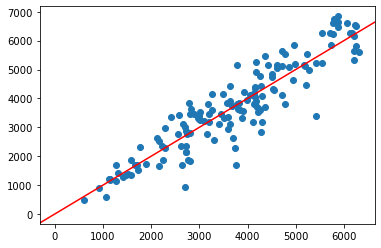

In [73]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_reg, y_test.registered,'o')
plt.axline([0,0],[1,1],color='red');

In [76]:
# Casuales

mse = mean_squared_error(y_test.casual,y_test.pred_casual,squared=False)
r2 = r2_score(y_test.casual,y_test.pred_casual)
print("Test MSE Error:",mse)
print("Test R2:",r2)

Test MSE Error: 298.356039876206
Test R2: 0.7599270156405138


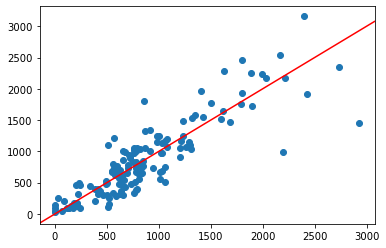

In [78]:
fig, ax = plt.subplots()
plt.plot(y_test.pred_casual, y_test.casual,'o')
plt.axline((0,0),(1,1),color='red');